# Performing PCA and implementing Linear Regression Model

## Import preliminary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
df = pd.read_csv("GYM.csv")

In [5]:
df.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


## General Observation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   day_of_week           62184 non-null  int64  
 2   is_weekend            62184 non-null  int64  
 3   is_holiday            62184 non-null  int64  
 4   temperature           62184 non-null  float64
 5   is_start_of_semester  62184 non-null  int64  
 6   is_during_semester    62184 non-null  int64  
 7   month                 62184 non-null  int64  
 8   hour                  62184 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.3 MB


## Data Cleaning

### Null Values

In [10]:
df.isnull().sum()

number_people           0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

### Duplicate values

In [12]:
df.duplicated().sum()

14218

In [13]:
df_duplicated = df[df.duplicated(keep=False)]

In [14]:
df_duplicated.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
1,45,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17
6,43,4,0,0,72.15,0,0,8,18
9,43,4,0,0,72.15,0,0,8,18
23,45,4,0,0,68.04,0,0,8,21


In [15]:
df["day_of_week"].unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

**As we can observe, the number of people are repeated on several different days. Since, a lot of people have a fixed time at which they attend the gym, the duplicate values should not surprise us. These could be repeated over several days. If we had date column, it would have given us more insights about these duplicate rows**

## Statistical Summary

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_people,62184.0,29.072543,22.689026,0.00,9.0,28.00,43.00,145.00
day_of_week,62184.0,2.982504,1.996825,0.00,1.0,3.00,5.00,6.00
is_weekend,62184.0,0.282870,0.450398,0.00,0.0,0.00,1.00,1.00
is_holiday,62184.0,0.002573,0.050660,0.00,0.0,0.00,0.00,1.00
temperature,62184.0,58.557108,6.316396,38.14,55.0,58.34,62.28,87.17
is_start_of_semester,62184.0,0.078831,0.269476,0.00,0.0,0.00,0.00,1.00
is_during_semester,62184.0,0.660218,0.473639,0.00,0.0,1.00,1.00,1.00
month,62184.0,7.439824,3.445069,1.00,5.0,8.00,10.00,12.00
hour,62184.0,12.236460,6.717631,0.00,7.0,12.00,18.00,23.00


## Visualization

<Axes: xlabel='hour', ylabel='Count'>

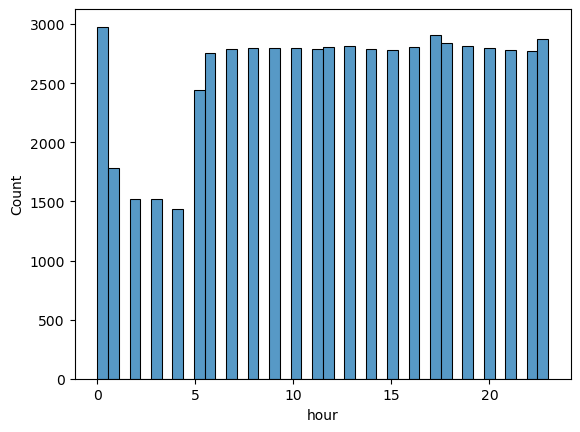

In [20]:
sns.histplot(x=df["hour"])

<Axes: xlabel='month', ylabel='Count'>

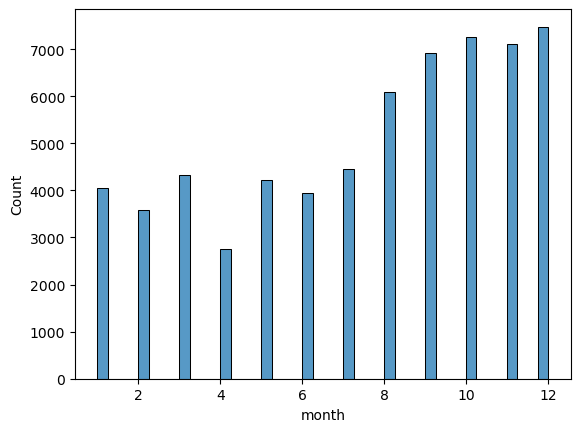

In [21]:
sns.histplot(x=df["month"])

<Axes: xlabel='temperature', ylabel='Count'>

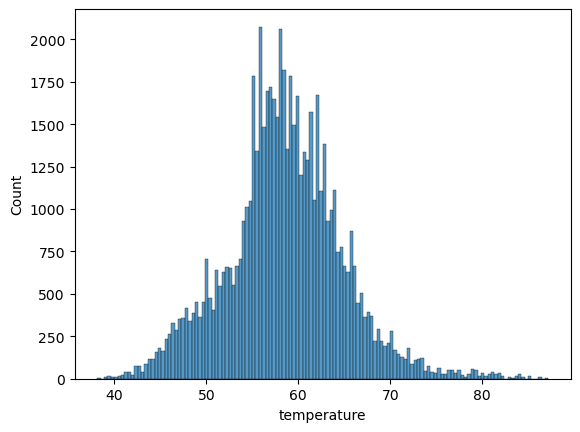

In [22]:
sns.histplot(x=df["temperature"])

<Axes: xlabel='number_people', ylabel='Count'>

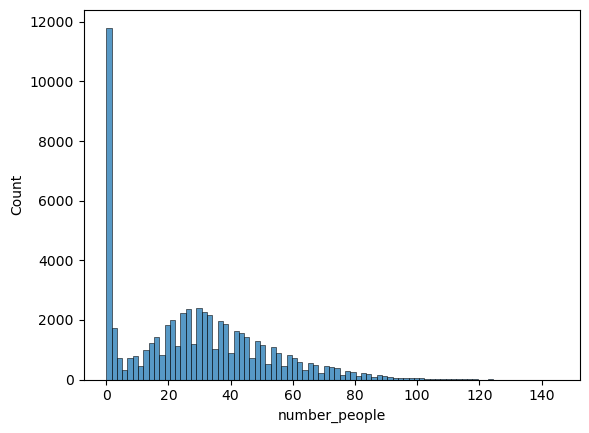

In [23]:
sns.histplot(x=df["number_people"])

#### Target Variable

In [25]:
y = df.iloc[:,0]

In [26]:
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

#### Input Features

In [28]:
X = df.iloc[:,1:]

In [29]:
X

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,4,0,0,71.76,0,0,8,17
1,4,0,0,71.76,0,0,8,17
2,4,0,0,71.76,0,0,8,17
3,4,0,0,71.76,0,0,8,17
4,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...
62179,5,1,0,61.07,0,1,3,18
62180,5,1,0,61.07,0,1,3,18
62181,5,1,0,56.71,0,1,3,19
62182,5,1,0,56.71,0,1,3,19


## Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_scaled = scaler.fit_transform(X)

In [34]:
X_scaled

array([[ 0.50956119, -0.6280507 , -0.05079022, ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.50956119, -0.6280507 , -0.05079022, ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.50956119, -0.6280507 , -0.05079022, ..., -1.39393832,
         0.16260365,  0.70911589],
       ...,
       [ 1.01036016,  1.59222814, -0.05079022, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 1.01036016,  1.59222814, -0.05079022, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 1.01036016,  1.59222814, -0.05079022, ...,  0.71739186,
        -1.28875789,  1.0068423 ]])

In [35]:
X.columns

Index(['day_of_week', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'month', 'hour'],
      dtype='object')

In [36]:
X_scaled = pd.DataFrame(X_scaled, columns = ['day_of_week', 'is_weekend', 'is_holiday', 'temperature',
       'is_start_of_semester', 'is_during_semester', 'month', 'hour'])

In [37]:
X_scaled.head()

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,0.509561,-0.628051,-0.05079,2.090274,-0.292535,-1.393938,0.162604,0.709116
1,0.509561,-0.628051,-0.05079,2.090274,-0.292535,-1.393938,0.162604,0.709116
2,0.509561,-0.628051,-0.05079,2.090274,-0.292535,-1.393938,0.162604,0.709116
3,0.509561,-0.628051,-0.05079,2.090274,-0.292535,-1.393938,0.162604,0.709116
4,0.509561,-0.628051,-0.05079,2.090274,-0.292535,-1.393938,0.162604,0.709116


## Implementing PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2, random_state=42)

In [41]:
X_pca = pca.fit_transform(X_scaled)

In [42]:
X_pca

array([[-0.04547233, -0.54569746],
       [-0.04547233, -0.54569746],
       [-0.04547233, -0.54569746],
       ...,
       [-1.76716814, -0.24778595],
       [-1.76716814, -0.24778595],
       [-1.76716814, -0.24778595]])

In [43]:
X_pca = pd.DataFrame(X_pca, columns = ["pc1", "pc2"])

In [44]:
X_pca.head()

,pc1,pc2
0,-0.045472,-0.545697
1,-0.045472,-0.545697
2,-0.045472,-0.545697
3,-0.045472,-0.545697
4,-0.045472,-0.545697


In [45]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Sum of EVR: {np.sum(pca.explained_variance_ratio_)}")

Explained variance ratio: [0.2252225  0.17367787]
Sum of EVR: 0.3989003703798456


**The total variance explained by two principal components is less than 40%**

In [47]:
pca_95 = PCA(0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(X_scaled)
X_pca_95

array([[-0.04547233, -0.54569746, -0.51022146, ..., -0.59285005,
         1.59437849,  0.5268085 ],
       [-0.04547233, -0.54569746, -0.51022146, ..., -0.59285005,
         1.59437849,  0.5268085 ],
       [-0.04547233, -0.54569746, -0.51022146, ..., -0.59285005,
         1.59437849,  0.5268085 ],
       ...,
       [-1.76716814, -0.24778595,  1.01009136, ..., -0.20902429,
        -0.98810123, -1.0267633 ],
       [-1.76716814, -0.24778595,  1.01009136, ..., -0.20902429,
        -0.98810123, -1.0267633 ],
       [-1.76716814, -0.24778595,  1.01009136, ..., -0.20902429,
        -0.98810123, -1.0267633 ]])

In [48]:
X_pca__95 = pd.DataFrame(X_pca_95)

In [49]:
X_pca_95.shape

(62184, 7)

**In order to retain 95% variance we are able to reduce only 1 dimension**

In [51]:
print(f"Explained Variance Ratio: {pca_95.explained_variance_ratio_}")

Explained Variance Ratio: [0.2252225  0.17367787 0.14494335 0.132616   0.11435459 0.09669059
 0.0866562 ]


In [52]:
from sklearn.model_selection import train_test_split, cross_val_score

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.42, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Quiz

**19) Use the Gym.csv dataset and Apply PCA in the given dataset, what is the minimum n_components required to attain 0.99% of variance?**

**A.4, B.5, C.6, C.7**

**Since the question does not specify whether we have to perform on the input features, with scaling, etc. we will calculate for all possible permutations**

#### For Scaled data

In [59]:
cov_matrix = np.cov(X_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs = sorted(eigenpairs, key=lambda x: x[0], reverse=True)
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print cumulative explained variance for each component
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.2252225  0.39890037 0.54384372 0.67645972 0.79081431 0.8875049
 0.9741611  1.        ]


#### For Input features without scaling

In [61]:
cov_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs = sorted(eigenpairs, key=lambda x: x[0], reverse=True)
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print cumulative explained variance for each component
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.50104783 0.83965103 0.95582655 0.99641325 0.99860557 0.99932639
 0.99997535 1.        ]


#### For the entire dataframe

In [63]:
cov_matrix = np.cov(df.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenpairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs = sorted(eigenpairs, key=lambda x: x[0], reverse=True)
total_variance = sum(eigenvalues)
explained_variance = [(i / total_variance) for i in sorted(eigenvalues, reverse=True)]

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print cumulative explained variance for each component
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

Cumulative Explained Variance:
[0.8691455  0.92538658 0.97441584 0.99310241 0.9994632  0.99977193
 0.99988984 0.99999595 1.        ]


**For unscaled dataframe, the answer is A.4**

**20) Apply PCA in the given dataset(gym.csv) with n_components as 2, Then get the original (approx.) data back from PCA, what is the difference in sum of variance of all columns before and after applying PCA?**

**A. 83.74, B.16.26, C.94.15, D.5.85**

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
approximate_original_data = pca.inverse_transform(X_pca)
original_variance = np.var(X, axis=0).sum()  # Total variance of the original data
approximate_variance = np.var(approximate_original_data, axis=0).sum()  # Total variance of the approximate data
var_difference = original_variance-approximate_variance
print(var_difference)

16.256175648248288


**Answer is B**

**21) Is it appropriate to use PCA as a method for preventing overfitting in machine learning models?**

**FALSE or
TRUE**

**Answer is True**

**22) What is the sum of eigenvalues calculated for the first 8 records(gym.csv) with the independent features?**

**A. 100.24, 
B. 102.94, 
C. 101.76, 
D. 98.32**

In [71]:
X_8 = X.iloc[0:8,:]

In [72]:
X_8

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,4,0,0,71.76,0,0,8,17
1,4,0,0,71.76,0,0,8,17
2,4,0,0,71.76,0,0,8,17
3,4,0,0,71.76,0,0,8,17
4,4,0,0,71.76,0,0,8,17
5,4,0,0,72.15,0,0,8,18
6,4,0,0,72.15,0,0,8,18
7,4,0,0,72.15,0,0,8,18


In [73]:
cov_matrix = X_8.cov()
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [74]:
eigenvalues

array([ 3.08598214e-01, -4.00473305e-19,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [75]:
sum_eigen = np.sum(eigenvalues)

In [76]:
sum_eigen

0.3085982142857144

**23) Compare the performance of two Linear Regression models(gym.csv):**

**The first model uses the raw data without any preprocessing.**

**The second model applies PCA with n_components set to 4 before fitting the data.**

**Both models should be generated using train_test_split with test_size=0.2 and random_state=24 during the train-test split. Your task is to calculate the Root Mean Squared Error (RMSE) for both models and determine whether the performance of the second model (PCA-based) is better compared to the first model (raw data).**

**A. Model 2 performance is not better than Model 1**

**B. No change in performance**

**C. Model 2 performance is better than Model 1**

In [78]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)

In [79]:
X_pca

,0,1,2,3
0,11.593770,7.921564,0.049396,0.899124
1,11.593770,7.921564,0.049396,0.899124
2,11.593770,7.921564,0.049396,0.899124
3,11.593770,7.921564,0.049396,0.899124
4,11.593770,7.921564,0.049396,0.899124
...,...,...,...,...
62179,6.107226,-1.610090,4.369962,2.167559
62180,6.107226,-1.610090,4.369962,2.167559
62181,4.364471,-5.720015,4.090512,2.185735
62182,4.364471,-5.720015,4.090512,2.185735


In [80]:
X_pca.rename(columns = {0 : "pc1",
                       1: "pc2",
                       2: "pc3",
                       3: "pc4"}, inplace=True)

In [81]:
X_pca

,pc1,pc2,pc3,pc4
0,11.593770,7.921564,0.049396,0.899124
1,11.593770,7.921564,0.049396,0.899124
2,11.593770,7.921564,0.049396,0.899124
3,11.593770,7.921564,0.049396,0.899124
4,11.593770,7.921564,0.049396,0.899124
...,...,...,...,...
62179,6.107226,-1.610090,4.369962,2.167559
62180,6.107226,-1.610090,4.369962,2.167559
62181,4.364471,-5.720015,4.090512,2.185735
62182,4.364471,-5.720015,4.090512,2.185735


#### Model for raw data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [84]:
lr = LinearRegression()

In [85]:
lr_model = lr.fit(X_train, y_train)
lr_predict = lr_model.predict(X_test)
r2score = r2_score(y_test, lr_predict)
print(r2score)

0.5104253827349026


#### Model for reduced dimensionality data

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=24)

In [88]:
lr_model_pca = lr.fit(X_train, y_train)
lr_predict_pca = lr_model_pca.predict(X_test)
r2score = r2_score(y_test, lr_predict_pca)
print(r2score)

0.41908820411585923


**Row data gives an r2_score of 0.51 while the pca data gives an r2_score of 0.42. So the answer is A**

**24) Compute min correlation in the given dataset?**

**A. -0.0822, B. -0.1841, C. -0.1739**

In [91]:
df.corr().min().min()

-0.1739578122762517

**Answer is C**

**25) Compare the performance of two Linear Regression models(gym.csv):**

**The first model uses the raw data without any preprocessing.**

**The second model applies standardscaler only to independent features and then apply PCA with n_components set to 4 before fitting the data.**

**Both models should be generated using train_test_split with test_size=0.2 and random_state=24 during the train-test split. Your task is to calculate the Root Mean Squared Error (RMSE) for both models and determine whether the performance of the second model (StandardScalar & PCA-based) is better compared to the first model (raw data).**

**A. Model 2 performance is better than Model 1**

**B. Model 2 performance is not better than Model 1**

**C. No change in performance**

In [94]:
from sklearn.pipeline import Pipeline

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [96]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=4)),
    ("lr", LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
lr_predict = lr_pipeline.predict(X_test)
r2score = r2_score(y_test, lr_predict)
print(r2score)

0.4763885400271679


**We have earlier calculated r2_score for raw data as 0.51. The correct answer is B**